In [129]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [130]:
car_dataframe = pd.read_csv("data/car details v4.csv")

In [131]:
car_dataframe.loc[:, ["Price", "Kilometer"]]

,Price,Kilometer
0,505000,87150
1,450000,75000
2,220000,67000
3,799000,37500
4,1950000,69000
...,...,...
2054,850000,90300
2055,275000,83000
2056,240000,73000
2057,4290000,60474


In [132]:
x = (car_dataframe.loc[:, ["Kilometer"]]).to_numpy().reshape(-1).astype('float64')
y = (car_dataframe.loc[:, ["Price"]]).to_numpy().reshape(-1).astype('float64')
x = x / x.mean() # normalize to avoid overflow error.
y = y / y.mean() # normalize to avoid overflow error.
print(x.shape)
print(x)
print(y.shape)
print(y)

(2059,)
[1.60720072 1.38313315 1.23559895 ... 1.3462496  1.11524792 1.32780782]
(2059,)
[0.29653697 0.26424087 0.12918442 ... 0.14092846 2.51909625 0.39342529]


In [133]:
def make_pred(x, w, b):
    return w*x+b

def compute_cost(x, y, w, b):
    m = float(x.shape[0])
    pred = make_pred(x, w, b)
    sqd_err = (pred-y)**2
    cost = np.sum(sqd_err) / (2*m)
    return cost 

def run_grad_decent(x, y, w, b, alpha):
    m = x.shape[0]
    diff = make_pred(x, w, b)-y
    new_w = w - alpha*(diff.dot(x))/m
    new_b = b - alpha*np.sum(diff)/m
    return new_w, new_b

In [134]:
def run_linear_regression(x, y, num_iter = 1000, alpha = .1):
    w = 1.
    b = 0.
    cost_history = []

    for _ in range(num_iter):
        w, b = run_grad_decent(x, y, w, b, alpha)

        cost = compute_cost(x, y, w, b)
        # print(cost)
        cost_history.append(cost)

    return w, b, cost_history 

In [135]:
#w, b, cost_history = run_linear_regression(x, y)
#print(cost_history)

-0.2025956458370619 1.2025956458370608


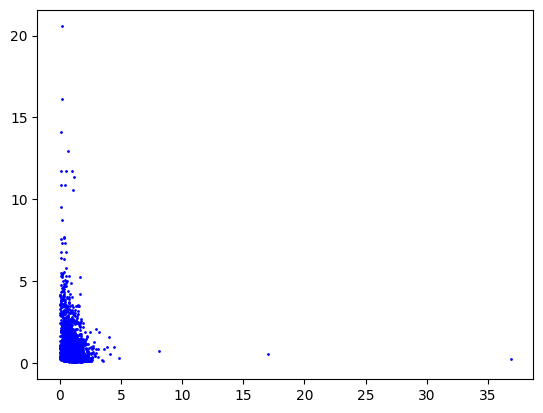

In [136]:
w, b, cost_history = run_linear_regression(x, y)

# print(cost_history)
print(w, b)

import matplotlib.pyplot as plt

plt.plot(x, y, 'bo', ms=1) 

plt.show()